### DSCI 320 Project Exploratory Data Analysis

- Kevin Mak 
- Peter Lee
- Ryan Peng

To start, we want to explore songs of genres specific to countries around the world. So when we import the dataset, we'll filter for songs of those genres. We'll also drop some irrelevant attributes, and rename some columns for easier access.

In [1]:
import pandas as pd

url = 'https://github.com/dispeter/dsci320/blob/main/spotify_tracks.csv?raw=true'
raw_spotify = pd.read_csv(url)

# filter songs by genres relating to countries around the world
genres = ['brazil', 'british', 'cantopop', 'french', 'german', 'indian', 'iranian', 'j-pop', 'k-pop', 'latin', 'latino', 'malay', 'mandopop', 'pop', 'spanish', 'swedish', 'turkish']
spotify = raw_spotify[raw_spotify["track_genre_1"].isin(genres)]

#drop irrelevant attributes
spotify = spotify.drop(['track_id', 'artist_2', 'artist_3', 'artist_4', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5', 
                       'explicit', 'time_signature'], axis=1)

#rename columns for easier access
spotify = spotify.rename({'artist_1' : 'artist', 'track_genre_1' : 'genre', 'duartion_s' : 'duration'}, axis=1)
spotify                



,track_name,album_name,artist,genre,mode,key,tempo,duration,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,energy,valence
8331,Luz em Todo Morro - Acústico,Acústico 3030,3030,brazil,Minor,E,128.14,280.45,47,0.711,-8.597,0.0491,0.7290,0.002830,0.708,0.495,0.514
8332,Brilho Na Alma,Arcano 19,3030,brazil,Minor,B,121.96,206.80,43,0.859,-6.180,0.0556,0.2790,0.000002,0.114,0.661,0.598
8333,Dentro De Um Instante,Arcano 19,3030,brazil,Minor,D,75.02,204.80,46,0.736,-9.999,0.0774,0.6530,0.000035,0.120,0.495,0.437
8334,Raízes,Arcano 19,3030,brazil,Minor,E,83.68,190.57,44,0.604,-11.259,0.0652,0.7940,0.000042,0.102,0.392,0.387
8335,Expectativas,Expectativas,3030,brazil,Minor,B,136.94,201.46,52,0.750,-9.219,0.0580,0.7980,0.000000,0.310,0.507,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88813,Dile Kolay Kalbe Değil,Bir Gece Yarası,Zakkum,turkish,Minor,B,165.87,307.42,45,0.430,-6.015,0.0291,0.0418,0.000000,0.127,0.624,0.439
88814,İkimiz de Yorgunuz,Bir Gece Yarası,Zakkum,turkish,Minor,F-sharp,169.96,236.99,41,0.465,-5.885,0.0317,0.2030,0.000000,0.122,0.582,0.532
88815,Hiç mi Özlemedin,"Duble, Vol. 1",Zakkum,turkish,Minor,E,179.86,202.12,42,0.388,-11.964,0.0445,0.2990,0.000142,0.158,0.398,0.429
88816,Sevdalılar Beni Anlar,Derin Aşk 4,Zara,turkish,Minor,E,108.03,241.30,40,0.720,-5.556,0.0373,0.1990,0.000000,0.350,0.723,0.451


In [2]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# UNIVARIATE SUMMARIES

## Nominal Univariate Visualizations

Our nominal attributes are genre, mode, and key. 

First let's start with finding the number of songs in each genre.



C:\Users\roxas\miniconda3\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


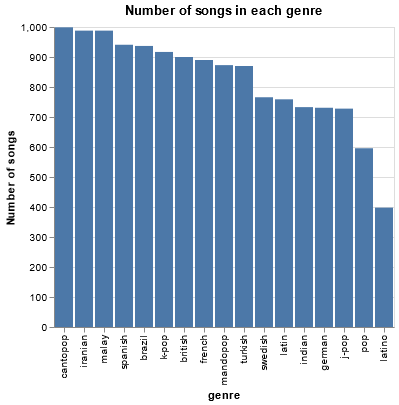

In [3]:
genre_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('genre:N', sort='-y'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Number of songs in each genre'
)
    

genre_eda

We see that cantopop has the most songs, while lantino has the least number of songs.

Now let's find how many songs are in each mode category (either minor or major)

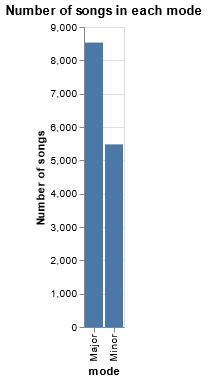

In [4]:
mode_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('mode:N', sort='-y'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Number of songs in each mode'
)
    

mode_eda

Much more songs are considered major than minor. 

Finally, let's find the number of songs in each key

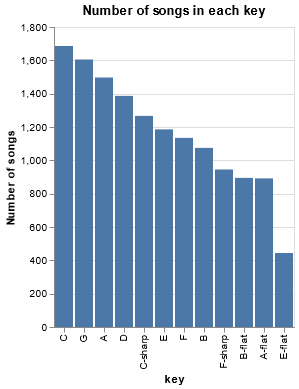

In [5]:
key_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('key:N', sort='-y'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Number of songs in each key'
)

key_eda
    

It looks like the C-key has the highest number of songs, making it a popular key to make a song in. Meanwhile, E-flat is the least chosen key to write a song in.

## Quantitative Univariate Visualizations

First, let's start by visualizing the number of songs in each tempo bin. 

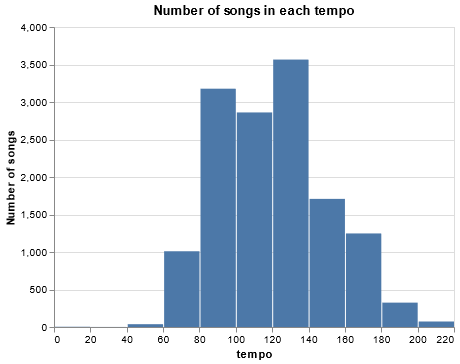

In [6]:
tempo_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('tempo:Q', bin=alt.BinParams(step=20), title='tempo'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Number of songs in each tempo'
)

tempo_eda

It looks like most songs are within the tempo of 120-140 bpm. 

Next, let's visualize the duration of all songs.

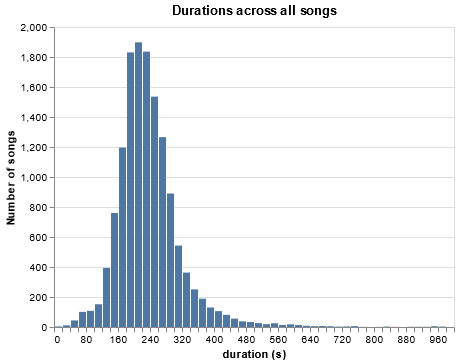

In [7]:
duration_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('duration:Q', bin=alt.BinParams(step=20, maxbins=50, extent=[0, 1000]), title='duration (s)'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Durations across all songs'
)

duration_eda

The duration of songs follows a normal distribution, with the peak between around 180-240 seconds. 

Next let's visualize the popularity of songs.

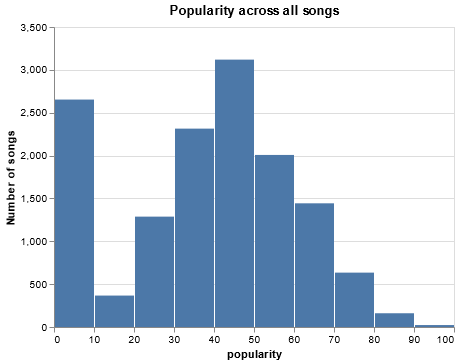

In [8]:
popularity_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('popularity:Q', bin=alt.BinParams(step=10), title='popularity'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Popularity across all songs'
)

popularity_eda

Many songs have popularity around the middle popularity values (30-60), which is to be expected as a lot of songs will have average popularity. Interestingly, the second most common popularity bin is 0-10 popularity, which probably reflects how many songs are uploaded to spotify by indie artists, but don't garner much attention from the public.

Next let's visualize the danceability of songs. 

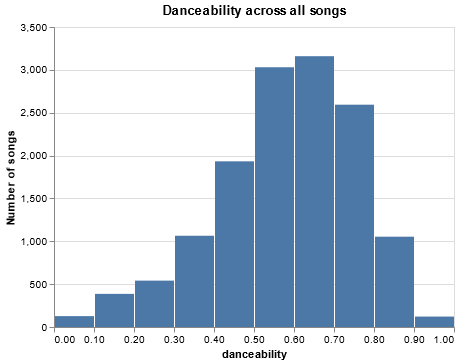

In [9]:
danceability_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('danceability:Q', bin=alt.BinParams(step=0.1), title='danceability'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Danceability across all songs'
)

danceability_eda

Most songs have above average danceability. 

Next, we'll visualize the loudness of songs.

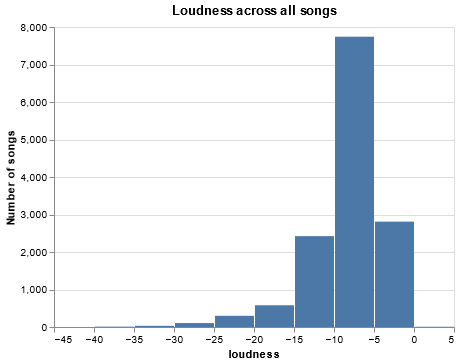

In [10]:
loudness_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('loudness:Q', bin=alt.BinParams(step=5), title='loudness'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Loudness across all songs'
)

loudness_eda

The majority of songs are between -5 and -10 loudness.

Now let's visualize the speechiness across the songs.

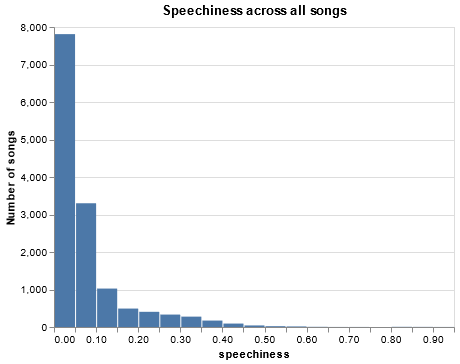

In [11]:
speechiness_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('speechiness:Q', bin=alt.BinParams(step=0.05), title='speechiness'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Speechiness across all songs'
)

speechiness_eda

The majority of songs fall within the 0.00-0.05 speechiness bin. 

Now let's visualize the acousticness of the songs.

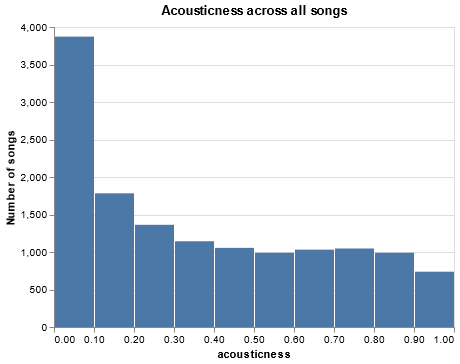

In [12]:
acousticness_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('acousticness:Q', bin=alt.BinParams(step=0.1), title='acousticness'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Acousticness across all songs'
)

acousticness_eda

The most common acousticness bin is 0.00 to 0.10 acousticness, though the songs counts for the higher acousticness bins follow a relative uniform distribution.

Now let's visualize the instrumentalness of the songs.

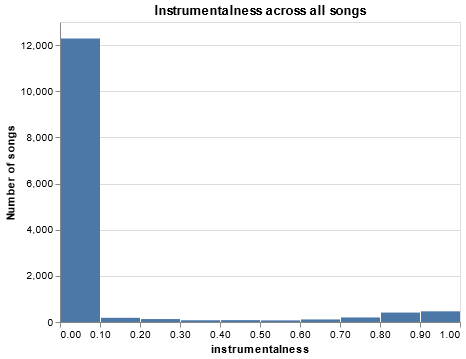

In [13]:
instrumentalness_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('instrumentalness:Q', bin=alt.BinParams(step=0.1), title='instrumentalness'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Instrumentalness across all songs'
)

instrumentalness_eda

The vast majority of our songs are within 0.00 to 0.10 instrumentalness. This could be because our chosen song genres are mainly pop-related, which don't feature many unique instruments per song. 

Next, let's visualize the liveness of the songs.

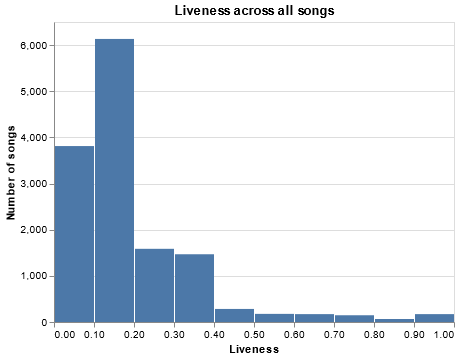

In [14]:
liveness_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('liveness:Q', bin=alt.BinParams(step=0.1), title='Liveness'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Liveness across all songs'
)

liveness_eda

The most common bin for liveness is the 0.10-0.20 bin. 

Next, let's visualize the energy of the songs.

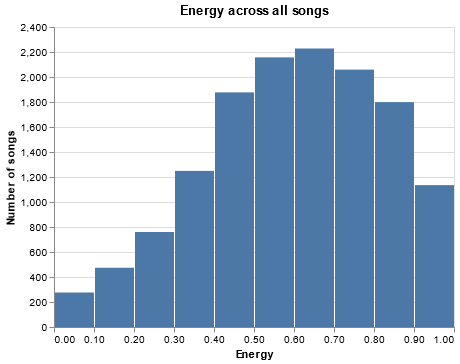

In [15]:
energy_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('energy:Q', bin=alt.BinParams(step=0.1), title='Energy'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Energy across all songs'
)

energy_eda

The energy of songs follows a slightly left skewed distribution, with most songs having energy between 0.50 and 0.80. 

Finally, let's visualize the valence of the songs.

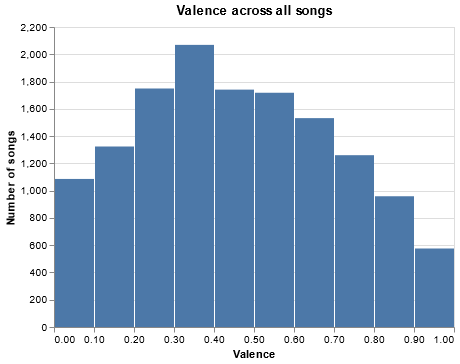

In [16]:
valence_eda = alt.Chart(spotify).mark_bar().encode(
    alt.X('valence:Q', bin=alt.BinParams(step=0.1), title='Valence'),
    alt.Y('count()', title='Number of songs')
).properties(
    title='Valence across all songs'
)

valence_eda

The valence of songs follows a slightly right skewed distribution. Most songs are within 0.20 to 0.60 valence, but the count values across each bin is pretty high, which indicates that there isn't a typical valence value to aim for when making a song. 

### Multivariate Visual Summaries

First, we wanted to compare the popularity of songs between each genre to see if we could find any trends. We can use a faceted histogram to visualize this.

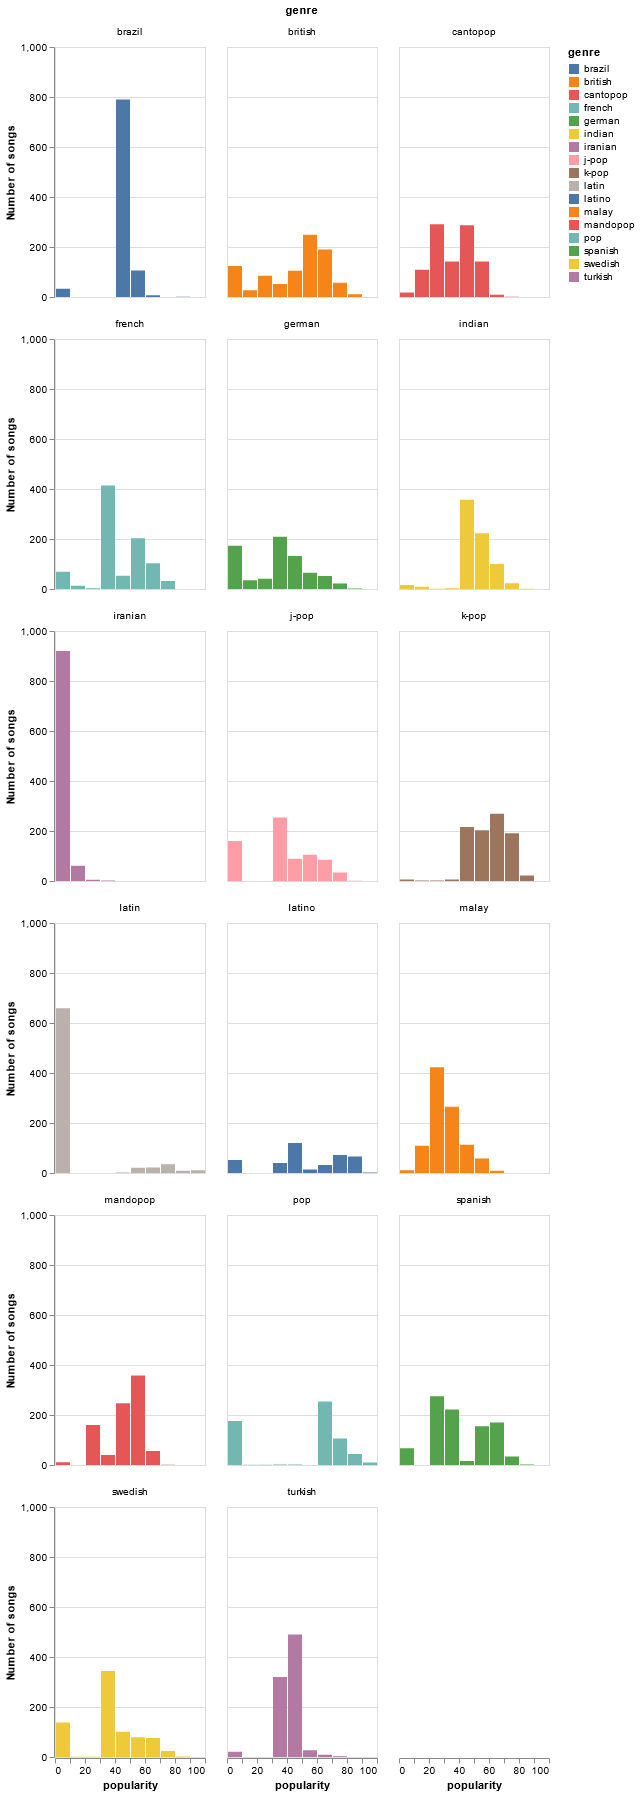

In [17]:
popularity_genre = alt.Chart(spotify).mark_bar().encode(
    alt.X('popularity:Q', bin=alt.BinParams(step=10), title='popularity'),
    alt.Y('count()', title='Number of songs'),
    alt.Color('genre:N')
).properties(
    title='Popularity across all songs',
    width=150,
    height=250
).facet(
    'genre:N',
    columns=3
)

popularity_genre

It seems that the k-pop, (American) pop, indian and lantino genres tend to be the more popular genres, with all of them having a high proportions of their songs in the above average popularity bins. Meanwhile, the latin and iranian genres seem to be the least popular genres by far, with both of them having a high proportion of their songs in the 0-10 popularity bin. The rest of the genres tend to produce songs of average popularity, with all of them having a high proportion of their songs falling within the middle popularity bins. 

Next, we were thinking of making a task around the correlation between tempo and popularity, so we'll make a quick scatterplot visualization between the two attributes to see if this is a good idea.

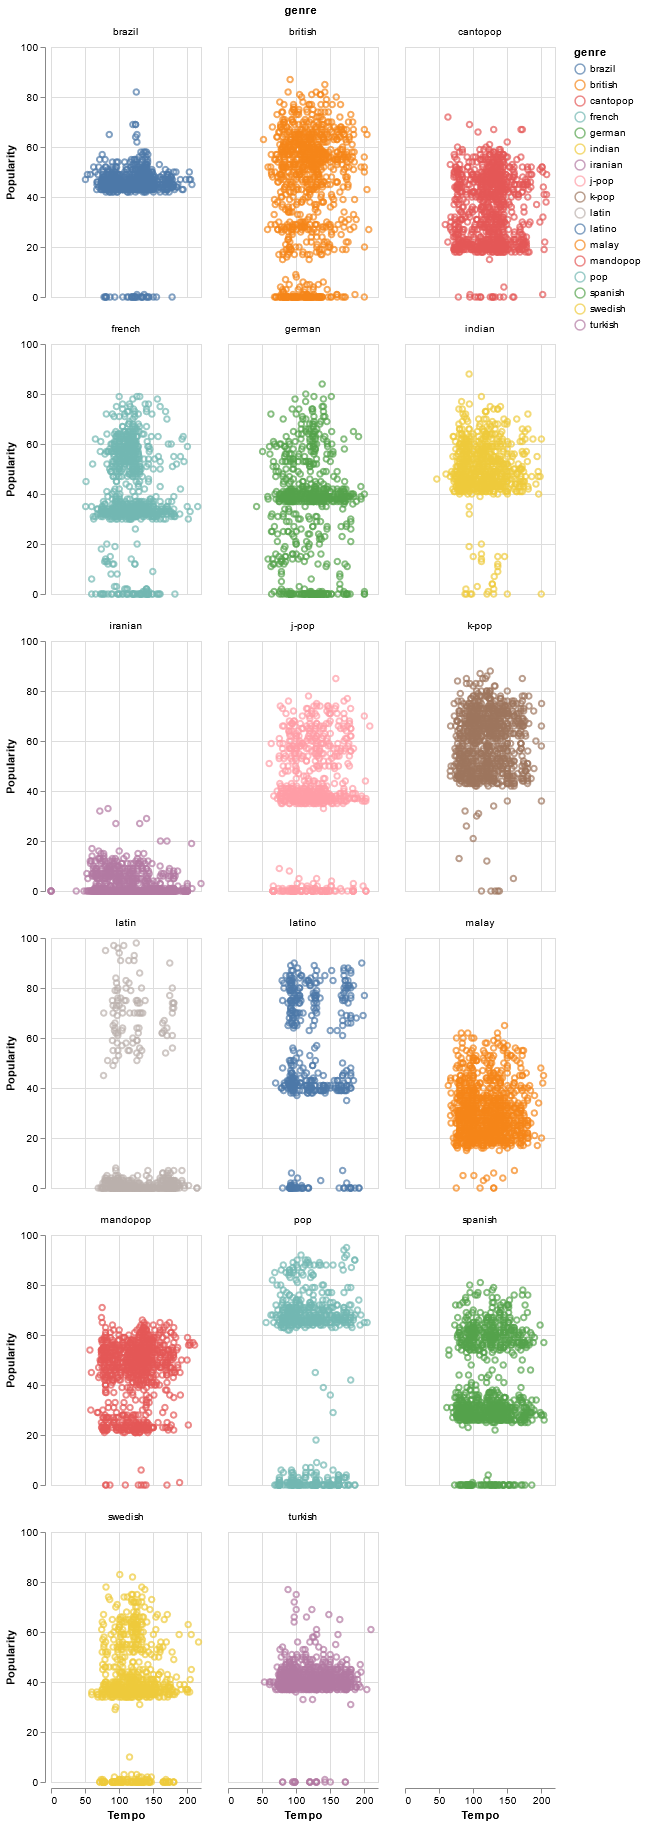

In [18]:
tempo_popularity = alt.Chart(spotify).mark_point().encode(
    alt.X('tempo:Q', title='Tempo'),
    alt.Y('popularity:Q', title='Popularity'),
    alt.Color('genre:N')
).properties(
    title='Correlation between tempo and popularity for each genre',
    width=150,
    height=250
).facet(
    'genre:N',
    columns=3
)

tempo_popularity

It looks like for all genres, there is little to no correlation between tempo and popularity. A task aiming to explore the correlation between these two attributes doesn't seem like a good idea.

Let's try to find the relationship between another two attributes, such as whether the mode of the song affects its valence. We can use a layered density plot to visualize this.

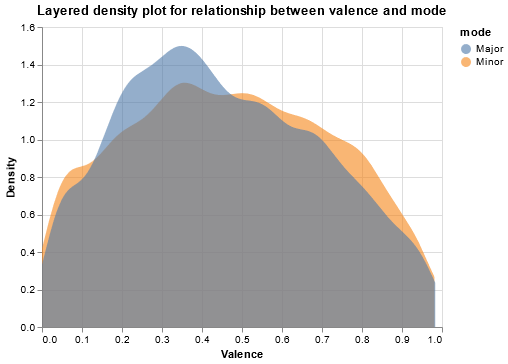

In [19]:
valence_mode = alt.Chart(spotify).transform_density(
    'valence',
    groupby = ['mode'],
    as_=['valence', 'density']
).mark_area(
    opacity = 0.6
).encode(
    alt.X('valence:Q', title='Valence'),
    alt.Y('density:Q', stack=None, title='Density'),
    alt.Color('mode:N')
).properties(
    title='Layered density plot for relationship between valence and mode'
)

valence_mode

It seems like the density distributions for the valence values between major and minor are relatively even. It looks like there are more songs that are written in major with valence values between 0.1 and 0.5 than minor. Conversely, there seems to be slightly more songs that are written in minor for valence values larger than 0.5. 

Finally, we wanted to see which mode was more popular for each key. We can use a stacked bar chart to visualize this. 

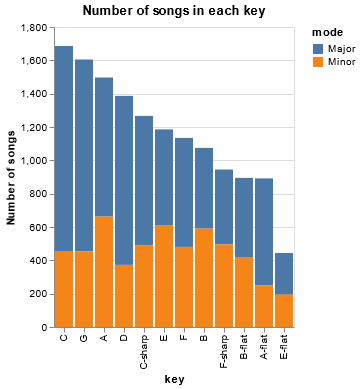

In [20]:
key_mode = alt.Chart(spotify).mark_bar().encode(
    alt.X('key:N', sort='-y'),
    alt.Y('count()', title='Number of songs'),
    alt.Color('mode:N')
).properties(
    title='Number of songs in each key'
)

key_mode
    

It looks like more songs are written in the major version of each key than minor. Additionally, it seems that C-major is the most popular key to write a song in.